In [1]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
import utilities as ut
from Thymio import Thymio
import os
import time
import serial
from AstolfiController import Astolfi
from SimpleController import SimpleController


In [2]:

from Thymio import Thymio
th = Thymio.serial(port='COM5', refreshing_rate=0.1)

In [3]:
th.set_var("motor.left.target", 200)
th.set_var("motor.right.target", 200)

IndexError: list assignment index out of range

In [ ]:
th.set_var("motor.left.target", 100)
th.set_var("motor.right.target", 2**16- 100)
#ccw

In [ ]:
th.set_var("motor.left.target", 2**16-100)
th.set_var("motor.right.target", 100)
#cw

In [13]:
th.set_var("motor.left.target", 0)
th.set_var("motor.right.target", 0)

In [ ]:
print(simp.next)

In [16]:
# trajectory = [(0.0,0.0),(2.0,0.0),(3.0,2.0),(4.0,5.0)]
# trajectory = [(0.0,0.0),(5.0,0.0),(10.0,5.0),(10.0,0.0),(0.0,0.0)]
# trajectory = [(0.0,0.0),(3.0,0.0),(3.0,3.0),(0.0,3.0),(0.0,0.0)]
# trajectory = [(0.0,0.0), (1.0,-1.0), (2.0,-1.5), (2.5, 1.5), (1.0,3.0),(0.0,0.0)]
# trajectory = [(0,0), (5,1), (10,1) ]

curr=np.array((0.0,0.0,0.0))

astol = Astolfi()
astol.set_curr(curr)
astol.set_path(trajectory)
simp = SimpleController(th)

simp.set_curr(curr)
simp.set_global(trajectory)
pba=[]
pos=[]
phi_dot=[]
i=0
simp.set_thymio(th)
simp.correct_heading()

while astol.on_goal==False and simp.on_goal==False:  

        astol.check_nodes(verbose=True)
        rho,alpha,beta = astol.polar_rep()
        if astol.rho < 1:
            pos.insert(i,[simp.curr[0],simp.curr[1],simp.curr[2]])
            simp.follow_line()
            simp.check_node()
            simp.correct_heading()
            astol.set_curr(simp.get_curr())
            astol.set_goal(simp.get_goal())
        
        elif astol.rho >= 1:
            pos.insert(i,[astol.curr[0],astol.curr[1],astol.curr[2]])
            
            
            phiL,phiR = astol.compute_phi_dot(fkine=True)
            phi_dot.append([phiL, -phiR])
            astol.run_on_thymio(th)
            simp.set_curr(astol.get_curr())  
            simp.set_goal(astol.get_goal())
            pba.append([rho,alpha,beta])      

        
        print(astol.curr)    
        time.sleep(astol.Ts)
        i+=1
th.set_var("motor.left.target", 0)
th.set_var("motor.right.target", 0)
pos.insert(i,[astol.curr[0],astol.curr[1],astol.curr[2]])
temp=pos
pos=np.array(pos)
global_path = np.array(astol.path)
pba = np.array(pba)
phi_dot=np.array(phi_dot)

simp is proceeding to next node [2. 0. 0.]
correcting heading
heading corrected
proceeding to next node
current goal is [2. 0. 0.]
[0.01125 0.      0.     ]
[0.0225 0.     0.    ]
[0.03375 0.      0.     ]
[0.045 0.    0.   ]
[0.05625 0.      0.     ]
[0.0675 0.     0.    ]
[0.07875 0.      0.     ]
[0.09 0.   0.  ]
[0.10125 0.      0.     ]
[0.1125 0.     0.    ]
[0.12375 0.      0.     ]
[0.135 0.    0.   ]
[0.14625 0.      0.     ]
[0.1575 0.     0.    ]
[0.16875 0.      0.     ]
[0.18 0.   0.  ]
[0.19125 0.      0.     ]
[0.2025 0.     0.    ]
[0.21375 0.      0.     ]
[0.225 0.    0.   ]
[0.23625 0.      0.     ]
[0.2475 0.     0.    ]
[0.25875 0.      0.     ]
[0.27 0.   0.  ]
[0.28125 0.      0.     ]
[0.2925 0.     0.    ]
[0.30375 0.      0.     ]
[0.315 0.    0.   ]
[0.32625 0.      0.     ]
[0.3375 0.     0.    ]
[0.34875 0.      0.     ]
[0.36 0.   0.  ]
[0.37125 0.      0.     ]
[0.3825 0.     0.    ]
[0.39375 0.      0.     ]
[0.405 0.    0.   ]
[0.41625 0.      0.     ]


In [ ]:
# pos[0,:]=np.array([0,0,0])
print(pos)
# print(phi_dot[1])


In [ ]:
pos=np.array(pos)
global_path = np.array(astol.path)
pba = np.array(pba)
phi_dot=np.array(phi_dot)

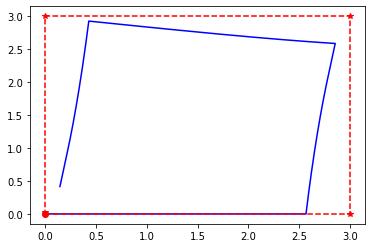

In [9]:
plt.subplots()
plt.plot(pos[:,0],pos[:,1],'b')
plt.plot(global_path[0,0],global_path[0,1],'rv')
plt.plot(global_path[:,0],global_path[:,1],'r*')
plt.plot(global_path[:,0],global_path[:,1],'r--')
plt.plot(global_path[-1,0],global_path[-1,1],'ro')


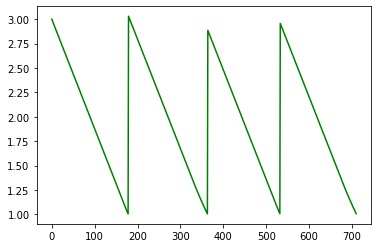

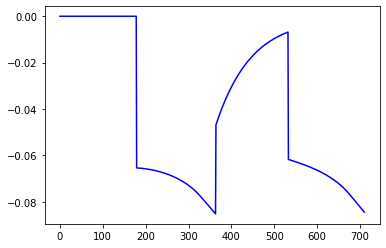

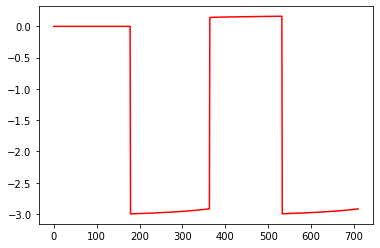

In [10]:
plt.subplots()
plt.plot(pba[:,0],'g',label='rho')
plt.subplots()
plt.plot(pba[:,1],'b',label='alpha')
plt.subplots()
plt.plot(pba[:,2],'r',label='beta')


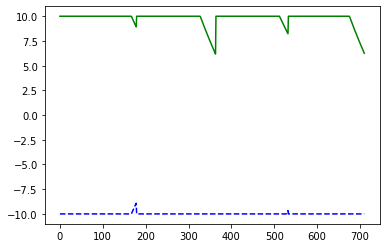

In [11]:
plt.subplots()
plt.plot(phi_dot[:,0],'g')
plt.plot(phi_dot[:,1],'--b')
plt.show()

In [ ]:
print(phi_dot[:,])